In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# The Project, use Python to build an email spam detector. Then, use machine learning to
# train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
# started!

In [39]:
data = pd.read_csv(r"C:\Users\tusha\Downloads\archive (2)\spam.csv")

In [40]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [42]:
data.shape

(5572, 2)

In [43]:
data.size

11144

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [45]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [46]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [47]:
data.duplicated().sum()

415

In [48]:
data.drop_duplicates(keep='first', inplace =True)

In [49]:
data.duplicated().sum()

0

In [50]:
data.size

10314

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data['Category']=encoder.fit_transform(data['Category'])
data['Category']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32

In [52]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


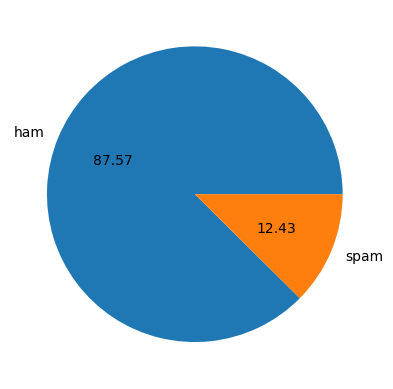

In [53]:
plt.pie(data['Category'].value_counts(), labels= ['ham','spam'], autopct = "%0.2f")
plt.show()

In [54]:
x = data['Message']

In [55]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [56]:
y = data['Category']

In [57]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: int32


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2, random_state = 3)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [60]:
cv = CountVectorizer()

In [61]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [62]:
print(x_train_cv)

  (0, 2461)	1
  (0, 1287)	1
  (0, 6819)	1
  (0, 6913)	1
  (0, 3405)	1
  (1, 950)	1
  (1, 2343)	1
  (1, 7651)	1
  (1, 3332)	1
  (1, 982)	1
  (1, 4914)	1
  (1, 6774)	1
  (1, 1603)	1
  (1, 6694)	1
  (1, 4385)	1
  (1, 3490)	1
  (1, 6898)	1
  (1, 6045)	1
  (1, 1644)	1
  (2, 6898)	1
  (2, 5969)	1
  (2, 4164)	1
  (2, 7157)	1
  (2, 4215)	1
  (2, 4665)	1
  :	:
  (4122, 6898)	1
  (4122, 3612)	1
  (4122, 6790)	1
  (4122, 3721)	1
  (4122, 4231)	1
  (4122, 3235)	1
  (4122, 3941)	1
  (4122, 6317)	1
  (4122, 6796)	1
  (4122, 4476)	1
  (4122, 6015)	1
  (4123, 6774)	1
  (4123, 1248)	1
  (4123, 6778)	1
  (4123, 5367)	1
  (4123, 4608)	1
  (4123, 7624)	1
  (4123, 1305)	1
  (4123, 1647)	1
  (4123, 5899)	1
  (4124, 3332)	1
  (4124, 6778)	1
  (4124, 6810)	1
  (4124, 4835)	1
  (4124, 7575)	1


In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [64]:
lr.fit(x_train_cv,y_train)
prediction_train = lr.predict(x_train_cv)

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,prediction_train)*100)

99.80606060606061


In [66]:
prediction_test = lr.predict(x_test_cv)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction_test)*100)

97.67441860465115
